In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
plt.style.use('ggplot')

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
SALES_DATA=pd.read_csv('SALES_DATA.csv')

In [5]:
SALES_DATA.info()
SALES_DATA.head(10)
SALES_DATA.columns

# There is no missing value 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566309 entries, 0 to 566308
Data columns (total 16 columns):
InvoiceNo           566309 non-null object
StockCode           566309 non-null object
Quantity Shipped    566309 non-null float64
Year                566309 non-null object
Invoice Date        566309 non-null object
UnitPrice           566309 non-null float64
Ext-Price           566309 non-null float64
CustomerID          566309 non-null int64
Country             566309 non-null object
GM%                 566309 non-null object
Shipper             566309 non-null object
COST                566309 non-null object
EXT COST            566309 non-null float64
REGION              566309 non-null object
SALES P             566309 non-null object
Unnamed: 15         166199 non-null float64
dtypes: float64(5), int64(1), object(10)
memory usage: 69.1+ MB


,InvoiceNo,StockCode,Quantity Shipped,Year,Invoice Date,UnitPrice,Ext-Price,CustomerID,Country,GM%,Shipper,COST,EXT COST,REGION,SALES P,Unnamed: 15
0,568200,PADS,5.000,"2,017",09/25/17,1.000,5.00,16198,United Kingdom,0%,Delivery Truck,1,4.999763,SOUTH,GRACE J,NaN
1,568375,BANK CHARGES,5.000,"2,017",09/26/17,1.000,5.00,13405,United Kingdom,100%,UPS Next day Air,-,0.000000,WEST,JEFF Y,NaN
2,561226,PADS,5.000,"2,017",07/26/17,1.000,5.00,15618,United Kingdom,0%,Delivery Truck,1,4.999763,SOUTH,GRACE J,NaN
3,2550193,PADS,7.080,"2,018",06/08/18,1.000,7.08,13952,United Kingdom,0%,UPS ground 2nd day,1,7.079664,CENTRAL,PETER T,NaN
4,550193,PADS,5.000,"2,017",04/15/17,1.000,5.00,13952,United Kingdom,0%,UPS ground 2nd day,1,4.999763,CENTRAL,PETER T,NaN
5,561047,16045,1.075,"2,017",07/24/17,1.004,1.08,16948,United Kingdom,0%,UPS ground 2nd day,1.01,1.080605,WEST,JEFF Y,NaN
6,560259,16045,6.450,"2,017",07/17/17,1.007,6.50,13654,United Kingdom,0%,UPS Next day Air,1.01,6.483628,CENTRAL,GAIL H,NaN
7,2558389,16045,46.956,"2,018",07/09/18,1.001,47.00,14383,United Kingdom,0%,UPS Next day Air,1.01,47.200809,SOUTH,GRACE J,NaN
8,558389,16045,3.225,"2,017",06/29/17,1.012,3.26,14383,United Kingdom,1%,UPS Next day Air,1.01,3.241814,SOUTH,GRACE J,NaN
9,C536757,84347,2.000,"2,016",12/02/16,1.003,2.01,15838,United Kingdom,24%,UPS ground 2nd day,0.76,1.522598,NORTH,JOHN A,NaN


Index(['InvoiceNo', 'StockCode', 'Quantity Shipped', 'Year', 'Invoice Date',
       'UnitPrice', 'Ext-Price', 'CustomerID', 'Country', 'GM%', 'Shipper',
       'COST', 'EXT COST', 'REGION', 'SALES P', 'Unnamed: 15'],
      dtype='object')

In [6]:
del SALES_DATA['Unnamed: 15']

SALES_DATA['Profit']=SALES_DATA['Ext-Price']-SALES_DATA['EXT COST']

In [7]:
SALES_DATA=SALES_DATA[SALES_DATA['Invoice Date']!='2/29/2018']

SALES_DATA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 566076 entries, 0 to 566308
Data columns (total 15 columns):
InvoiceNo           566076 non-null object
StockCode           566076 non-null object
Quantity Shipped    566076 non-null float64
Year                566076 non-null object
Invoice Date        566076 non-null object
UnitPrice           566076 non-null float64
Ext-Price           566076 non-null float64
CustomerID          566076 non-null int64
Country             566076 non-null object
GM%                 566076 non-null object
Shipper             566076 non-null object
COST                566076 non-null object
EXT COST            566076 non-null float64
REGION              566076 non-null object
SALES P             566076 non-null object
dtypes: float64(4), int64(1), object(10)
memory usage: 69.1+ MB


In [8]:
SALES_DATA['Invoice Date']=pd.to_datetime(SALES_DATA['Invoice Date'])

lat_date=SALES_DATA['Invoice Date'].max()
print('The latest invoice date is:', lat_date)
ear_date=SALES_DATA['Invoice Date'].min()
print('The earliest invoice date is:', ear_date)

The latest invoice date is: 2018-12-27 00:00:00
The earliest invoice date is: 2016-12-01 00:00:00


In [9]:
cust=SALES_DATA[['CustomerID']].drop_duplicates()
print("No of customers are:", len(cust))

No of customers are: 4146


In [10]:
coun=SALES_DATA['Country'].drop_duplicates()
print("No of countires are:", len(coun))

SALES_DATA['Country'].unique()

No of countires are: 38


array(['United Kingdom', 'EIRE', 'Germany', 'France', 'Israel', 'Austria',
       'Norway', 'Finland', 'Spain', 'Belgium', 'Switzerland', 'Portugal',
       'Netherlands', 'Singapore', 'Japan', 'Sweden', 'Malta', 'Greece',
       'Hong Kong', 'Unspecified', 'Cyprus', 'Canada',
       'United Arab Emirates', 'Australia', 'Italy', 'Channel Islands',
       'Denmark', 'USA', 'Poland', 'Iceland', 'Czech Republic', 'RSA',
       'European Community', 'Lebanon', 'Saudi Arabia', 'Lithuania',
       'Bahrain', 'Brazil'], dtype=object)

In [11]:
# Checking country wise customer distribution:

In [12]:
cust_country=SALES_DATA[['Country','CustomerID']].drop_duplicates()

cust_country_count=cust_country.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID',ascending=False)
cust_country_count

,Country,CustomerID
36,United Kingdom,3753
14,Germany,91
13,France,88
10,EIRE,31
31,Spain,30
3,Belgium,24
33,Switzerland,22
27,Portugal,18
19,Italy,13
12,Finland,11


<Figure size 864x576 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

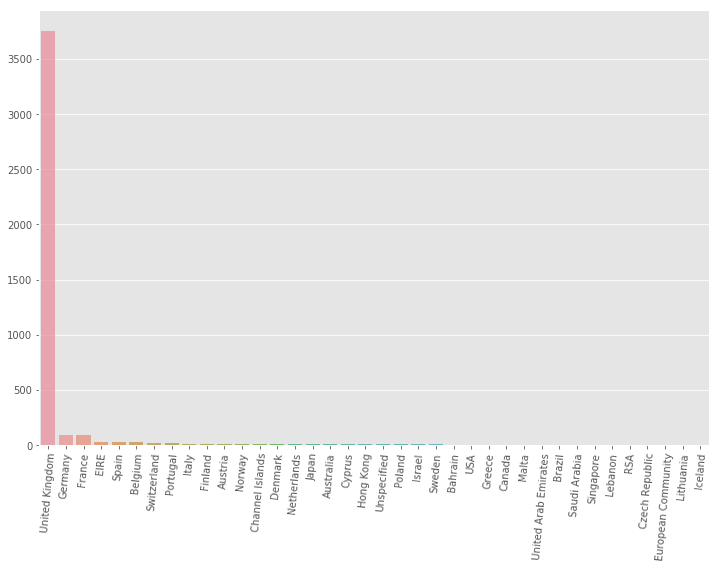

In [13]:
country=list(cust_country_count['Country'])
cust_id=list(cust_country_count['CustomerID'])
plt.figure(figsize=(12,8))
sns.barplot(country, cust_id, alpha=0.8)
plt.xticks(rotation='85')

# It can be seen from the graph that around 90% of the customers exist in United Kingdom only followed by Germany and France. 

In [14]:
sales_data_UK=SALES_DATA.loc[SALES_DATA['Country']=='United Kingdom']

In [15]:
columns=['InvoiceNo', 'StockCode','Invoice Date', 'CustomerID', 'Country', 'Shipper', 'REGION', 'SALES P']

In [16]:
def unique_counts(df):
    for i in columns:
        counts=df[i].nunique()
        print(i, ": ", counts)
unique_counts(sales_data_UK)

InvoiceNo :  22742
StockCode :  3894
Invoice Date :  656
CustomerID :  3753
Country :  1
Shipper :  4
REGION :  4
SALES P :  6


In [17]:
# RFM Analysis

In [18]:
import datetime as dt
NOW=dt.datetime(2018,12,27)

In [19]:
rfmTable=SALES_DATA.groupby('CustomerID',as_index=False).agg({'Invoice Date': lambda x: (NOW - x.max()).days, 'InvoiceNo': lambda x: len(x), 'Ext-Price': lambda x: x.sum()})
rfmTable['Invoice Date']=rfmTable['Invoice Date'].astype(int)
rfmTable.rename(columns={'Invoice Date': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'Ext-Price': 'Monetary_value'}, inplace=True)
rfmTable.head(10)

,CustomerID,Recency,Frequency,Monetary_value
0,12346,232,2,750867.97
1,12347,21,221,22725.40
2,12348,12,50,20105.77
3,12349,401,69,982.19
4,12350,148,33,1000.91
5,12352,100,73,1861.92
6,12353,82,8,371.31
7,12354,69,105,18197.91
8,12355,51,12,1793.56
9,12356,92,50,3257.31


In [20]:
quantiles=rfmTable.quantile([0.2,0.4,0.6,0.8]).to_dict()
quantiles

{'CustomerID': {0.2: 13504.0, 0.4: 14684.0, 0.6: 15865.0, 0.8: 17081.0},
 'Recency': {0.2: 19.0, 0.4: 78.0, 0.6: 180.0, 0.8: 427.0},
 'Frequency': {0.2: 16.0, 0.4: 33.0, 0.6: 66.0, 0.8: 146.0},
 'Monetary_value': {0.2: 450.64, 0.4: 1242.88, 0.6: 3181.35, 0.8: 9145.48}}

In [21]:
def r_score(x,p,d):
    if x <= d[p][0.2]:
        return 5
    elif x <= d[p][0.4]:
        return 4
    elif x <= d[p][.6]:
        return 3
    elif x <= d[p][.8]:
        return 2
    else:
        return 1

In [22]:
def fm_score(x,p,d):
    if x <= d[p][0.2]:
        return 1
    elif x <= d[p][0.4]:
        return 2
    elif x <= d[p][0.6]: 
        return 3
    elif x <= d[p][0.8]: 
        return 4
    else:
        return 5

In [23]:
rfmTable['Recency_Flag']=rfmTable['Recency'].apply(r_score, args=('Recency',quantiles,))
rfmTable['Freq_Flag']=rfmTable['Frequency'].apply(fm_score, args=('Frequency',quantiles,))
rfmTable['Monetory_Flag']=rfmTable['Monetary_value'].apply(fm_score, args=('Monetary_value',quantiles,))

In [24]:
rfmTable['RFMScore']=rfmTable['Recency_Flag'].map(str)+rfmTable['Freq_Flag'].map(str)+rfmTable['Monetory_Flag'].map(str)
rfmTable.head(10)

,CustomerID,Recency,Frequency,Monetary_value,Recency_Flag,Freq_Flag,Monetory_Flag,RFMScore
0,12346,232,2,750867.97,2,1,5,215
1,12347,21,221,22725.40,4,5,5,455
2,12348,12,50,20105.77,5,3,5,535
3,12349,401,69,982.19,2,4,2,242
4,12350,148,33,1000.91,3,2,2,322
5,12352,100,73,1861.92,3,4,3,343
6,12353,82,8,371.31,3,1,1,311
7,12354,69,105,18197.91,4,4,5,445
8,12355,51,12,1793.56,4,1,3,413
9,12356,92,50,3257.31,3,3,4,334


In [25]:
# The top 10 customers of the company
rfmTable[rfmTable['RFMScore']=='555'].sort_values('Monetary_value',ascending=False).head(10)

,CustomerID,Recency,Frequency,Monetary_value,Recency_Flag,Freq_Flag,Monetory_Flag,RFMScore
1631,14646,5,2471,992688.48,5,5,5,555
1812,14911,5,5992,588004.51,5,5,5,555
51,12415,14,829,526458.16,5,5,5,555
2713,16203,16,731,488965.72,5,5,5,555
2594,16029,2,2072,481705.99,5,5,5,555
1986,15159,13,844,470630.19,5,5,5,555
4013,18102,19,452,450669.35,5,5,5,555
3835,17841,2,8854,391481.22,5,5,5,555
1278,14156,2,1381,319784.35,5,5,5,555
3603,17511,13,1211,303783.31,5,5,5,555


In [26]:
# Recency

In [27]:
rfmTable['Recency_Flag'].value_counts()

5    867
3    835
2    833
1    818
4    793
Name: Recency_Flag, dtype: int64

<Figure size 864x576 with 0 Axes>

Text(0,0.5,'Count')

Text(0.5,0,'Recency_Flag')

Text(0.5,1,'Frequency of Recency_Flag')

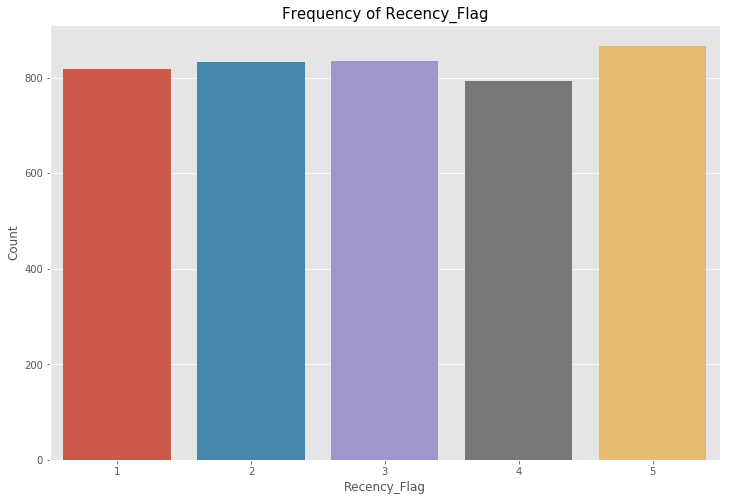

In [28]:
plt.figure(figsize=(12,8))
sns.countplot(x='Recency_Flag', data=rfmTable)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Recency_Flag', fontsize=12)
plt.title('Frequency of Recency_Flag', fontsize=15)

In [29]:
# Frequency

In [30]:
rfmTable['Freq_Flag'].value_counts()

1    891
3    833
5    827
4    822
2    773
Name: Freq_Flag, dtype: int64

<Figure size 864x576 with 0 Axes>

Text(0,0.5,'Count')

Text(0.5,0,'Freq_Flag')

Text(0.5,1,'Frequency of Freq_Flag')

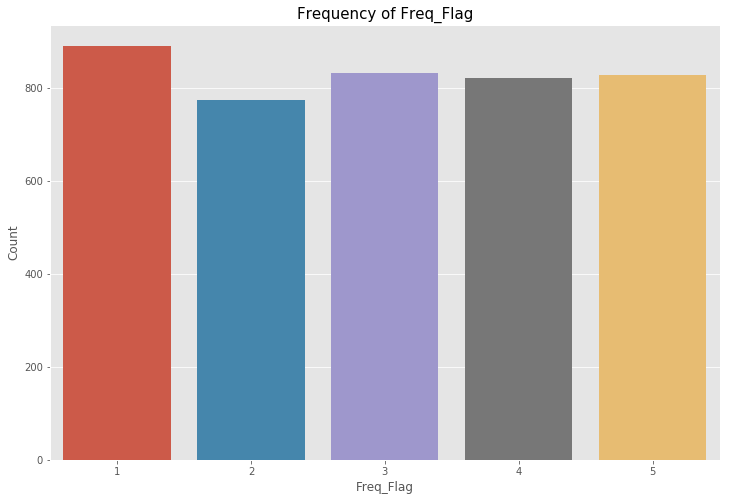

In [31]:
plt.figure(figsize=(12,8))
sns.countplot(x='Freq_Flag', data=rfmTable)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Freq_Flag', fontsize=12)
plt.title('Frequency of Freq_Flag', fontsize=15)

In [32]:
# Monetary Value (M):

In [33]:
rfmTable['Monetory_Flag'].value_counts()

1    830
3    829
2    829
5    829
4    829
Name: Monetory_Flag, dtype: int64

<Figure size 864x576 with 0 Axes>

Text(0,0.5,'Count')

Text(0.5,0,'Monetory_Flag')

Text(0.5,1,'Frequency of Monetory_Flag')

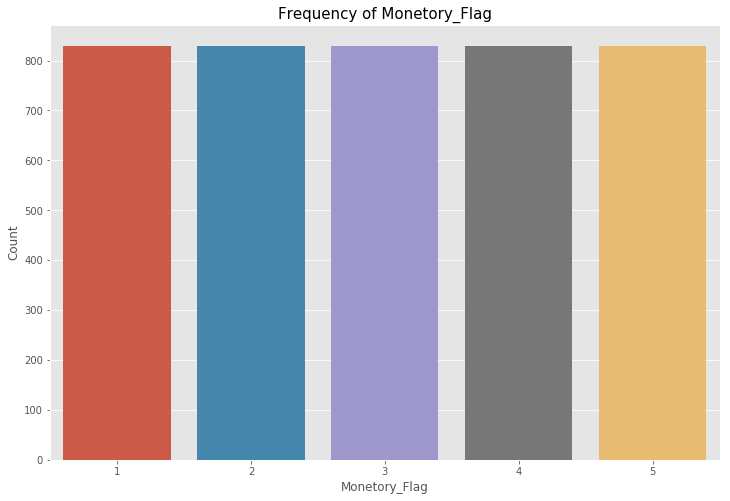

In [34]:
plt.figure(figsize=(12,8))
sns.countplot(x='Monetory_Flag', data=rfmTable)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Monetory_Flag', fontsize=12)
plt.title('Frequency of Monetory_Flag', fontsize=15)

In [35]:
# Key RFM segments
rfmTable['RFMScore'].value_counts()

555    369
111    305
211    182
455    153
444    147
333    119
122    116
232    116
544    110
344     95
132     94
222     94
121     93
243     83
221     80
433     78
311     77
322     68
554     67
343     67
454     62
355     62
545     60
323     54
332     51
354     50
434     48
445     46
334     45
533     44
      ... 
114      7
144      7
245      7
415      7
442      7
131      6
425      5
154      5
414      5
513      5
125      5
115      4
315      4
525      4
421      3
235      3
353      3
514      3
153      2
531      2
515      2
342      2
145      2
225      1
431      1
331      1
553      1
155      1
542      1
135      1
Name: RFMScore, Length: 109, dtype: int64

In [36]:
def f(row):
    if 4 <= row['Recency_Flag'] <= 5 and 4 <= row['FM_Mean'] <= 5:
        val = 'Champions'
    elif 3 <= row['Recency_Flag'] <= 5 and 3 <= row['FM_Mean'] <= 5:
        val = 'Loyal Customers'
    elif 3 <= row['Recency_Flag'] <= 5 and 1 <= row['FM_Mean'] <= 3:
        val = 'Potential Loyalist'
    elif 2 <= row['Recency_Flag'] <= 3 and 1 <= row['FM_Mean'] <= 3:
        val = 'About To Sleep'
    elif 0 <= row['Recency_Flag'] <= 2 and 2 <= row['FM_Mean'] <= 5:
        val = 'At Risk'
    elif 1 <= row['Recency_Flag'] <= 2 and 1 <= row['FM_Mean'] <= 2:
        val = 'Hibernating' 
    return val

def f(row):
    if 4 <= row['Recency_Flag'] <= 5 and 4 <= row['FM_Mean'] <= 5:
        val = 'Champions'
    elif 3 <= row['Recency_Flag'] <= 5 and 3 <= row['FM_Mean'] <= 5:
        val = 'Loyal Customers'
    elif 3 <= row['Recency_Flag'] <= 5 and 1 <= row['FM_Mean'] <= 3:
        val = 'Potential Loyalist'
    elif 1 <= row['Recency_Flag'] <= 2 and 1 <= row['FM_Mean'] <= 2:
        val = 'Hibernating' 
    elif 1 <= row['Recency_Flag'] <= 3 and 1 <= row['FM_Mean'] <= 5:
        val = 'Customers Needing Attention'
    return val

In [37]:
rfmTable.insert(7,'FM_Mean',(rfmTable['Freq_Flag'] + rfmTable['Monetory_Flag'])/2)

In [38]:
rfmTable['Segment']=rfmTable.apply(f, axis=1)

In [39]:
rfmTable.groupby('Segment').count()['CustomerID']

Segment
About To Sleep         652
At Risk                562
Champions             1040
Hibernating            437
Loyal Customers        843
Potential Loyalist     612
Name: CustomerID, dtype: int64

In [40]:
def f(row):
    if row['Segment'] == 'Champions':
        val = 'Give rewards; Build credibility; Promote New Products'
    elif row['Segment'] == 'Loyal Customers':
        val = 'Take feedbacks and surveys; Upsell your products; Present Bonuses'
    elif row['Segment'] == 'Potential Loyalist':
        val = 'Offer loyalty program; Run contests; Make them feel special'
    elif row['Segment'] == 'About To Sleep':
        val = 'Share valuable resource; Give your competitor analysis; Give relevant updates'
    elif row['Segment'] == 'At Risk':
        val = 'Offer Credit; Provide a wishlist; Upgrade offers'
    elif row['Segment'] == 'Hibernating': 
        val = 'Decide if you want them back; Review your product; Send personalized campaign'
    return val

In [41]:
rfmTable['Strategy']=rfmTable.apply(f, axis=1)

In [42]:
rfmTable.to_csv('customer_segment.csv',index=False)